<a href="https://colab.research.google.com/github/CarlesG/Pytorch-curso/blob/main/Repaso_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import numpy as np

# Introducción 
Vamos a aplicar regresión lineal, utilizando el framework de Pytorch, utilizando para ello el modelo lineal. El ejemplo que vamos a utilizar es el mismo que se nos da en el notebook [aquí](https://jovian.ai/aakashns/02-linear-regression). Báásicamente los datos nos dan la infomación de las cosechas en diferentes localizaciones, de manzanas y naranjas, en función de las siguiente variables:
* Temperatura (F)
* Lluvia (mm)
* Humedad (%)

![imagen](https://i.imgur.com/6Ujttb4.png)
Los pasos que vamos a seguir para realizar la regresíon y obtener un modelo para predecir el resultado de las cosechas de estos dos cultivos, son los siguientes:



# 1. Preparación del dataset
Nos dan el dataset directamente con los arrays siguientes de numpy:


In [47]:
# temp, rainfall , humidity

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (manzanas, naranjas)

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

Como podemos ver, tendremos variables de entrada, y objetivos, o variables de salida. Convertimos los arrays de numpy a tensores, para poder trabajar con pytorch. 

In [48]:
# convertimos los arrays a tensores

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

Para poder acceder a los datos como tuplas, utilizamos la estructura `Datase`. Para cargar los batches de forma desordenada y aleatoria, y no pasarle a nuestro modelo todas las entradas a la vez, lo que se utiliza es el `Dataloader`. Si recorremos toda la tupla generada con Dataloader, recorreremos todo el dataset, pero con un tamaño de batch determinada y además, podemos agregarle la opción de barajar los inputs de forma aleatoria. Esto ayuda a la convergencia más rápida, al buscar el mínimo de la función de pérdidas.

In [24]:
# cargamos las librerías para manipular el dataset

from torch.utils.data import TensorDataset, DataLoader
data_st = TensorDataset(inputs,targets)
data_ld = DataLoader(data_st, batch_size = 2, shuffle = True)


NameError: ignored

# 2. Generación del modelo
Generamos el modelo, con lo que ya se inicializaría aleatoriamente los pesos y las bias, de la siguiente forma

In [50]:
# Generamos el modelo de predición

nn = torch.nn
model = nn.Linear(3,2) # Tenemos tres variables de entrada (temperatura, lluvia y humedad) y dos de salida (manzanas y naranjas)

# Para ver los parámetros del modelo

print(model)
print(model.weight)
print(model.bias)

list(model.parameters())

Linear(in_features=3, out_features=2, bias=True)
Parameter containing:
tensor([[ 0.5102,  0.4020, -0.4707],
        [-0.2625, -0.5539,  0.4460]], requires_grad=True)
Parameter containing:
tensor([-0.3933, -0.3700], requires_grad=True)


[Parameter containing:
 tensor([[ 0.5102,  0.4020, -0.4707],
         [-0.2625, -0.5539,  0.4460]], requires_grad=True),
 Parameter containing:
 tensor([-0.3933, -0.3700], requires_grad=True)]

# 3. Función de pérdidas
 Definimos la función de coste

In [51]:
import torch.nn.functional as F

# Definimos la función de pérdidas
loss_fn = F.mse_loss

# Computamos
loss = loss_fn(model(inputs), targets)

# 4. Optimización por el gradiente descendente.
para iniciar el optimizador, tenemos que pasarle los parámetros a optimizar, es decir, los parámetros de nuestro modelo:


In [52]:
learning_rate = 1e-5
opt = torch.optim.SGD(model.parameters(),learning_rate)

# 5. Entrenando el modelo

Una vez definidos todos los anteriores puntos, estamos listos para realizar el entrenamiento de nuestro modelo, para ello, realizamos la siguiente funcióón que realiza los siguientes pasos:
1. Generar la predicción. No es mas que propagar nuestro batch de entrada a través del modelo
2. Calcular la función de coste 
3. Computar los gradientes con la función `backward`
4. Actualizar los pesos.
5. Resetear los gradientes, para que no se acumulen en el grafo computacional.
6. Cada 10 epochs  mostrar el último valor actual de la función de pérdidas, mediante `loss.item`

In [53]:
def entrenamiento(num_epochs, model, loss_fn, opt, data_ld):
  # Repetimos para un determinaod valor de epochs

  for epoch in range(num_epochs):
    
    for xb, yb in data_ld:
      
      pred = model(xb)
      loss = loss_fn(pred, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0: # cada múltiplo de diez nos muestra la siguiente info
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
      

Ahora podemos ejecutar la función, pasándole los parámetros establecidos en la función anterior:

In [54]:
entrenamiento(1000, model, loss_fn, opt, data_ld)

Epoch [10/1000], Loss: 43.3282
Epoch [20/1000], Loss: 9.7504
Epoch [30/1000], Loss: 136.8109
Epoch [40/1000], Loss: 12.3838
Epoch [50/1000], Loss: 107.6113
Epoch [60/1000], Loss: 0.2165
Epoch [70/1000], Loss: 6.3346
Epoch [80/1000], Loss: 6.8692
Epoch [90/1000], Loss: 48.8000
Epoch [100/1000], Loss: 11.4085
Epoch [110/1000], Loss: 34.9169
Epoch [120/1000], Loss: 13.1906
Epoch [130/1000], Loss: 26.1035
Epoch [140/1000], Loss: 3.5146
Epoch [150/1000], Loss: 7.3578
Epoch [160/1000], Loss: 0.9540
Epoch [170/1000], Loss: 0.8320
Epoch [180/1000], Loss: 4.9975
Epoch [190/1000], Loss: 2.6542
Epoch [200/1000], Loss: 2.7295
Epoch [210/1000], Loss: 1.0036
Epoch [220/1000], Loss: 1.8078
Epoch [230/1000], Loss: 1.3858
Epoch [240/1000], Loss: 0.5884
Epoch [250/1000], Loss: 0.6512
Epoch [260/1000], Loss: 1.7475
Epoch [270/1000], Loss: 4.0574
Epoch [280/1000], Loss: 0.4688
Epoch [290/1000], Loss: 3.3292
Epoch [300/1000], Loss: 3.0393
Epoch [310/1000], Loss: 1.6401
Epoch [320/1000], Loss: 0.0449
Epoch 

Comparamos la salida predecida con la salida que sabemos que tiene que dar:

In [57]:
pred = model(inputs)


RuntimeError: ignored

In [56]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# Predecir otras salidas 

In [32]:
model(torch.tensor([75., 63., 44.]))

tensor([nan], grad_fn=<SqueezeBackward3>)

# Otros ejemplos
## Regresión cuadrática o polinomial
Vamos a suponer que tenemos los siguientes puntos, que se parecen a una función cuadrática, de la forma $f(x) = w_0 + w_1 x + w_2 x^2$:




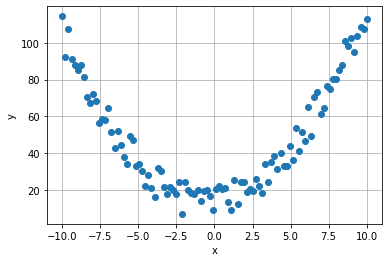

In [2]:
# Creamos el dataset de los puntos:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

x = np.linspace(-10,10,100)
y = x**2 + 0.7 * x + 3.0 + 20 * np.random.rand(len(x))  

plt.plot(x,y,'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Tenemos que crear el set de entrenamiento, para ello, realizamos lo siguiente:


In [3]:
# Generamos los coeficientes del polinomio
x_train = torch.FloatTensor([[xval ** 2, xval ** 1, 1] for xval in x]) # esto se puede hacer genérico para cualquier grado polinomial
y_train = torch.FloatTensor(y)
# lo convertimos a columna
y_train = y_train.view(100,-1)
print(y_train.shape)
print(x_train.shape)

torch.Size([100, 1])
torch.Size([100, 3])


Creamos el modelo de predicción, en este caso sin bias:

In [4]:
nn = torch.nn
model = nn.Linear(3, 1,bias=False) # tenemos tres de entrada y una de salida, según el modelo cuadrático
print(model.weight)

Parameter containing:
tensor([[-0.0728, -0.5715, -0.0863]], requires_grad=True)


Indicamos la función de coste y el método de optimización:

In [33]:
# Definimos la función de pérdidas
loss_fn = F.mse_loss

# Computamos la función de pérdidas
loss = loss_fn(model(x_train), y_train)

# Definimos la función de coste
learning_rate = 1e-8
opt = torch.optim.SGD(model.parameters(),learning_rate)

Definimos la función de entrenamiento:

In [34]:
def entrenamiento(num_epochs, model, loss_fn, opt, x_train, y_train):
  # Repetimos para un determinaod valor de epochs

  for epoch in range(1, num_epochs + 1):

      pred = model(x_train)
      loss = loss_fn(pred, y_train)
      loss.backward()
      opt.step()
      opt.zero_grad()

      if (epoch+1) % 10 == 0: # cada múltiplo de diez nos muestra la siguiente info
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Aplicamos la función de entrenamiento:

In [35]:
entrenamiento(100000, model, loss_fn, opt, x_train, y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch [50010/100000], Loss: 31.2491
Epoch [50020/100000], Loss: 31.2491
Epoch [50030/100000], Loss: 31.2491
Epoch [50040/100000], Loss: 31.2491
Epoch [50050/100000], Loss: 31.2491
Epoch [50060/100000], Loss: 31.2491
Epoch [50070/100000], Loss: 31.2491
Epoch [50080/100000], Loss: 31.2491
Epoch [50090/100000], Loss: 31.2491
Epoch [50100/100000], Loss: 31.2491
Epoch [50110/100000], Loss: 31.2491
Epoch [50120/100000], Loss: 31.2491
Epoch [50130/100000], Loss: 31.2491
Epoch [50140/100000], Loss: 31.2491
Epoch [50150/100000], Loss: 31.2491
Epoch [50160/100000], Loss: 31.2491
Epoch [50170/100000], Loss: 31.2491
Epoch [50180/100000], Loss: 31.2491
Epoch [50190/100000], Loss: 31.2491
Epoch [50200/100000], Loss: 31.2491
Epoch [50210/100000], Loss: 31.2491
Epoch [50220/100000], Loss: 31.2491
Epoch [50230/100000], Loss: 31.2491
Epoch [50240/100000], Loss: 31.2491
Epoch [50250/100000], Loss: 31.2491
Epoch [50260/100000], Loss: 31.2491
Epo

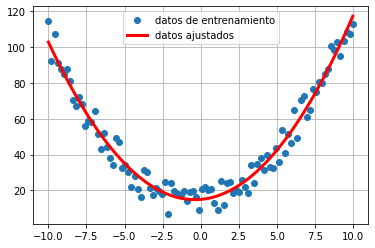

In [36]:
pred = model(x_train)
plt.plot(x, y, 'o', label='datos de entrenamiento')
plt.plot(x,pred.detach().numpy(), '-r', linewidth=3, label='datos ajustados') # detach es para indicarle que no necesita el gradiente
plt.grid()
plt.legend()
plt.show()

Probamos a no lanzar con todo el set de entrenamiento a la vez, trabajamos con batches de tamaño 5. Para ello, hay que realizar lo siguiente:

In [48]:

from torch.utils.data import TensorDataset, DataLoader
data_st = TensorDataset(x_train,y_train)
data_ld = DataLoader(data_st, batch_size = 9, shuffle = False)
for xb,yb in data_ld:
  print(xb)
  print(yb)
  break

def entrenamiento(num_epochs, model, loss_fn, opt,data_ld):
  # Repetimos para un determinaod valor de epochs

  for epoch in range(1, num_epochs + 1):
    for xb, yb in data_ld:
      pred = model(xb)
      loss = loss_fn(pred, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0: # cada múltiplo de diez nos muestra la siguiente info
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

tensor([[100.0000, -10.0000,   1.0000],
        [ 96.0004,  -9.7980,   1.0000],
        [ 92.0824,  -9.5960,   1.0000],
        [ 88.2461,  -9.3939,   1.0000],
        [ 84.4914,  -9.1919,   1.0000],
        [ 80.8183,  -8.9899,   1.0000],
        [ 77.2268,  -8.7879,   1.0000],
        [ 73.7170,  -8.5859,   1.0000],
        [ 70.2887,  -8.3838,   1.0000]])
tensor([[114.4473],
        [ 92.2528],
        [107.2587],
        [ 90.9947],
        [ 87.9137],
        [ 84.9521],
        [ 87.8019],
        [ 81.1297],
        [ 70.6215]])


In [49]:
entrenamiento(5000, model, loss_fn, opt, data_ld)

Epoch [10/5000], Loss: 15.7609
Epoch [20/5000], Loss: 15.7101
Epoch [30/5000], Loss: 15.6597
Epoch [40/5000], Loss: 15.6092
Epoch [50/5000], Loss: 15.5592
Epoch [60/5000], Loss: 15.5097
Epoch [70/5000], Loss: 15.4604
Epoch [80/5000], Loss: 15.4114
Epoch [90/5000], Loss: 15.3632
Epoch [100/5000], Loss: 15.3155
Epoch [110/5000], Loss: 15.2679
Epoch [120/5000], Loss: 15.2207
Epoch [130/5000], Loss: 15.1738
Epoch [140/5000], Loss: 15.1269
Epoch [150/5000], Loss: 15.0808
Epoch [160/5000], Loss: 15.0351
Epoch [170/5000], Loss: 14.9899
Epoch [180/5000], Loss: 14.9449
Epoch [190/5000], Loss: 14.9003
Epoch [200/5000], Loss: 14.8561
Epoch [210/5000], Loss: 14.8120
Epoch [220/5000], Loss: 14.7680
Epoch [230/5000], Loss: 14.7245
Epoch [240/5000], Loss: 14.6813
Epoch [250/5000], Loss: 14.6387
Epoch [260/5000], Loss: 14.5963
Epoch [270/5000], Loss: 14.5540
Epoch [280/5000], Loss: 14.5117
Epoch [290/5000], Loss: 14.4695
Epoch [300/5000], Loss: 14.4278
Epoch [310/5000], Loss: 14.3869
Epoch [320/5000],

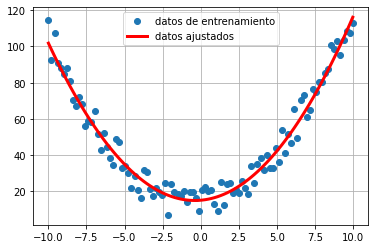

In [50]:
pred = model(x_train)
plt.plot(x, y, 'o', label='datos de entrenamiento')
plt.plot(x,pred.detach().numpy(), '-r', linewidth=3, label='datos ajustados') # detach es para indicarle que no necesita el gradiente
plt.grid()
plt.legend()
plt.show()